In [46]:
# Import all the neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
# Initalize the OData URL
odata_url = 'https://data.lacity.org/api/odata/v4/2nrs-mtv8'


In [3]:
# Initialize an empty list to store all data frames
all_data = []

while odata_url:
    # Make a request to the OData URL
    response = requests.get(odata_url)
    data = response.json()

    # Convert the 'value' part of the response to a Dataframe and append it to the list
    df = pd.DataFrame(data['value'])
    all_data.append(df)

    # Check if there is a next page 
    odata_url = data.get('@odata.nextLink')


# Concatenate all data frames into a single DataFrame
crime_data = pd.concat(all_data, ignore_index=True)

crime_data_copy = crime_data.copy()

,__id,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,...,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,row-n2f7~6wwh-8ytp,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,...,AA,Adult Arrest,510,998,None,None,1900 S LONGWOOD AV,None,34.0375,-118.3506
1,row-2pyq-it3j_ms5w,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,1800,01,Central,0182,1,330,...,IC,Invest Cont,330,998,None,None,1000 S FLOWER ST,None,34.0444,-118.2628
2,row-megi~zerq-hrzh,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,1700,03,Southwest,0356,1,480,...,IC,Invest Cont,480,None,None,None,1400 W 37TH ST,None,34.0210,-118.3002
3,row-ky9z~rzgf-8xxk,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,...,IC,Invest Cont,343,None,None,None,14000 RIVERSIDE DR,None,34.1576,-118.4387
4,row-umma-5ftk~zby4,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,06,Hollywood,0666,2,354,...,IC,Invest Cont,354,None,None,None,1900 TRANSIENT,None,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951603,row-cr5b.dbc9.xnu6,241604405,2024-01-14T00:00:00.000,2024-01-13T00:00:00.000,0720,16,Foothill,1673,1,230,...,IC,Invest Cont,230,None,None,None,8700 LANKERSHIM BL,None,34.2271,-118.3878
951604,row-ct5f~92xa-2q5j,242106032,2024-02-20T00:00:00.000,2024-02-17T00:00:00.000,2330,21,Topanga,2103,1,420,...,IC,Invest Cont,420,None,None,None,22700 NAPA ST,None,34.2260,-118.6214
951605,row-g7nq-c794-pu24,242004546,2024-01-16T00:00:00.000,2024-01-16T00:00:00.000,1510,20,Olympic,2013,2,624,...,IC,Invest Cont,624,None,None,None,HOBART BL,3RD ST,34.0690,-118.3054
951606,row-2zgm-2phh~khrg,240104953,2024-01-15T00:00:00.000,2024-01-15T00:00:00.000,0100,01,Central,0101,2,745,...,IC,Invest Cont,745,None,None,None,1300 W SUNSET BL,None,34.0685,-118.2460


In [26]:
crime_data_copy = crime_data.copy()

In [27]:
# Drop __id column as it is irrelevant for the analysis and crm_cd_1 and crm_cd are the same (according to data definition). 

crime_data_copy.drop(['__id', 'crm_cd_1'], axis=1, inplace=True)

In [28]:
crime_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951608 entries, 0 to 951607
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dr_no           951608 non-null  object 
 1   date_rptd       951608 non-null  object 
 2   date_occ        951608 non-null  object 
 3   time_occ        951608 non-null  object 
 4   area            951608 non-null  object 
 5   area_name       951608 non-null  object 
 6   rpt_dist_no     951608 non-null  object 
 7   part_1_2        951608 non-null  int64  
 8   crm_cd          951608 non-null  object 
 9   crm_cd_desc     951608 non-null  object 
 10  mocodes         816159 non-null  object 
 11  vict_age        951608 non-null  object 
 12  vict_sex        822716 non-null  object 
 13  vict_descent    822706 non-null  object 
 14  premis_cd       951597 non-null  float64
 15  premis_desc     951040 non-null  object 
 16  weapon_used_cd  324847 non-null  object 
 17  weapon_des

In [30]:
# Convert columns from string to int

columns_to_convert_to_int = ['dr_no', 'area' ,'rpt_dist_no', 'part_1_2', 'crm_cd', 'vict_age', 'premis_cd']

for int_column in columns_to_convert_to_int:
    crime_data_copy[int_column] = pd.to_numeric(crime_data_copy[int_column])

# Convert object data types to datetime

columns_to_convert_to_datetime = ['date_rptd', 'date_occ']
for dt_column in columns_to_convert_to_datetime:
    crime_data_copy[dt_column] = pd.to_datetime(crime_data_copy[dt_column])

In [31]:
crime_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951608 entries, 0 to 951607
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dr_no           951608 non-null  int64         
 1   date_rptd       951608 non-null  datetime64[ns]
 2   date_occ        951608 non-null  datetime64[ns]
 3   time_occ        951608 non-null  object        
 4   area            951608 non-null  int64         
 5   area_name       951608 non-null  object        
 6   rpt_dist_no     951608 non-null  int64         
 7   part_1_2        951608 non-null  int64         
 8   crm_cd          951608 non-null  int64         
 9   crm_cd_desc     951608 non-null  object        
 10  mocodes         816159 non-null  object        
 11  vict_age        951608 non-null  int64         
 12  vict_sex        822716 non-null  object        
 13  vict_descent    822706 non-null  object        
 14  premis_cd       951597 non-null  flo

In [32]:
crime_data_copy.rename(
    columns={
        'dr_no': 'Division of Records Number',
        'date_rptd': 'Reported Date',
        'date_occ': 'Occurance Date',
        'time_occ': 'Occurance Time',
        'area': 'Area',
        'area_name': 'Area Name',
        'rpt_dist_no': 'Reporting District Number',
        'part_1_2': 'Part 1 or 2',
        'crm_cd': 'Crime Code',
        'crm_cd_desc': 'Crime Code Description',
        'mocodes': 'Modus Operandi Codes',
        'vict_age': 'Victim Age',
        'vict_sex': 'Victim Sex',
        'vict_descent': 'Victim Descent',
        'premis_cd': 'Premise Code',
        'premis_desc': 'Premise Description',
        'weapon_used_cd': 'Weapon Used Code',
        'weapon_desc': 'Weapon Description',
        'status': 'Case Status',
        'status_desc': 'Case Status Description',
        'crm_cd_2': 'Crime Code 2',
        'crm_cd_3': 'Crime Code 3',
        'crm_cd_4': 'Crime Code 4',
        'location': 'Location',
        'cross_street': 'Cross Street',
        'lat': 'Latitude',
        'lon': 'Longitude'
        
    }, inplace= True
)

In [33]:
crime_data_copy['Report Delayed in Days'] = (crime_data_copy['Reported Date'] - crime_data_copy['Occurance Date']).dt.days

In [35]:
crime_data_copy.sort_values(by='Reported Date', inplace=True)

In [37]:
crime_data_copy.set_index('Reported Date', inplace=True)



,Division of Records Number,Occurance Date,Occurance Time,Area,Area Name,Reporting District Number,Part 1 or 2,Crime Code,Crime Code Description,Modus Operandi Codes,...,Case Status,Case Status Description,Crime Code 2,Crime Code 3,Crime Code 4,Location,Cross Street,Latitude,Longitude,Report Delayed in Days
Reported Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,200104302,2020-01-01,0001,1,Central,153,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 2032,...,IC,Invest Cont,None,None,None,500 S SPRING ST,None,34.0467,-118.2520,0
2020-01-01,201804035,2020-01-01,1430,18,Southeast,1802,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1810,...,IC,Invest Cont,None,None,None,8700 S FIGUEROA ST,None,33.9587,-118.2827,0
2020-01-01,200400504,2020-01-01,2200,4,Hollenbeck,424,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1407 0334 1100 0371 0906 1822,...,IC,Invest Cont,998,None,None,DARWIN,THOMAS,34.0700,-118.1998,0
2020-01-01,201504076,2020-01-01,0500,15,N Hollywood,1513,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329 1609,...,IC,Invest Cont,None,None,None,12500 VANOWEN ST,None,34.1940,-118.4052,0
2020-01-01,201304030,2020-01-01,0200,13,Newton,1394,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329 0416,...,IC,Invest Cont,None,None,None,200 E 68TH ST,None,33.9779,-118.2717,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-10,241410206,2024-06-01,0700,14,Pacific,1496,1,510,VEHICLE - STOLEN,None,...,IC,Invest Cont,None,None,None,9800 VICKSBURG AV,None,33.9473,-118.3940,9
2024-06-10,241212448,2024-06-09,1650,12,77th Street,1259,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344,...,IC,Invest Cont,None,None,None,7200 STANFORD AV,None,33.9747,-118.2630,1
2024-06-10,240210792,2024-06-10,1305,2,Rampart,281,1,440,THEFT PLAIN - PETTY ($950 & UNDER),1822 0344,...,IC,Invest Cont,None,None,None,1200 S HOOVER ST,None,34.0493,-118.2842,0


In [51]:
crime_per_month = crime_data_copy['Crime Code'].resample('ME').count()

## Crime Trend Analysis

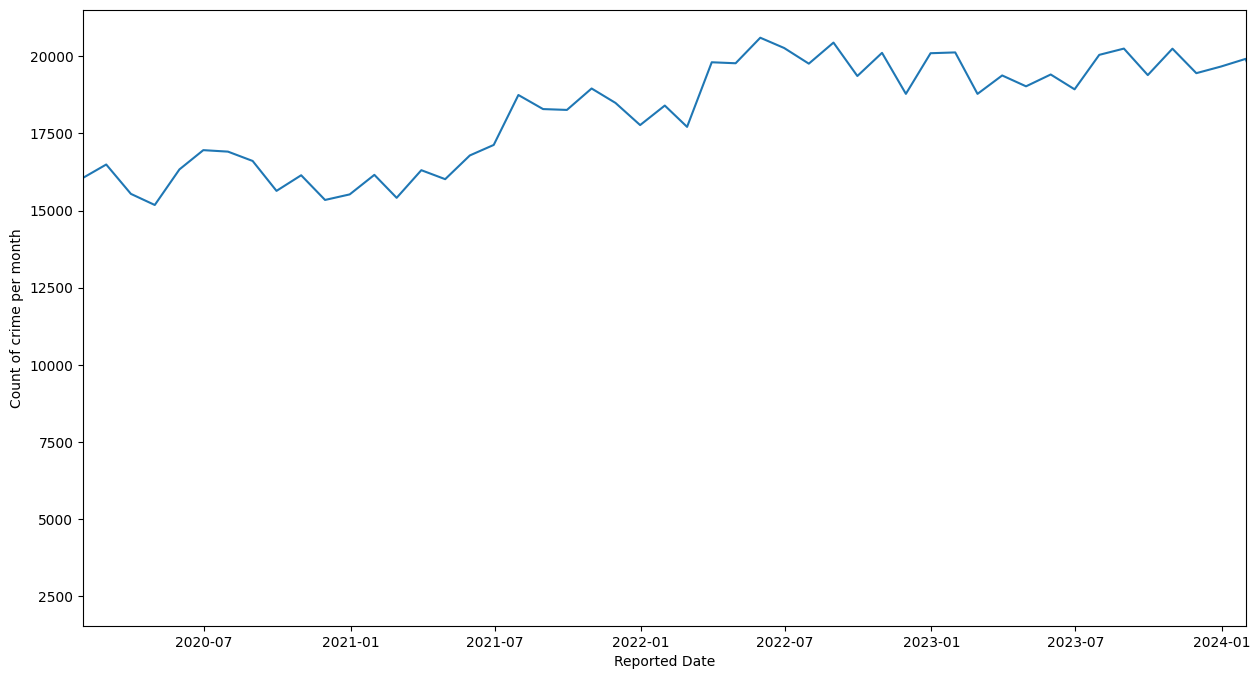

In [67]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=crime_per_month)
plt.ylabel('Count of crime per month')
ax.set_xlim(crime_per_month.index[0], pd.to_datetime('2024-01-31'))

plt.show()